<a href="https://colab.research.google.com/github/MRAMIRE/Tesis_Modelo_Deep_Learning_USA/blob/master/5_Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALIZACIÓN DE RESULTADOS:**

###FELIPE ANTONIO MELO CIFUENTES

###MARIA CAMILA RAMIREZ FERRO

##### Clonación de repositorio github

In [1]:
import os
if os.path.exists('Tesis_Modelo_Deep_Learning_USA/'):
  !git -C Tesis_Modelo_Deep_Learning_USA/ fetch --all
  !git -C Tesis_Modelo_Deep_Learning_USA/ reset --hard origin/master
  !git -C Tesis_Modelo_Deep_Learning_USA/ pull origin master;
else:
  !git clone https://github.com/MRAMIRE/Tesis_Modelo_Deep_Learning_USA.git
%cd Tesis_Modelo_Deep_Learning_USA/
from utils import *
from Unet import *

Cloning into 'Tesis_Modelo_Deep_Learning_USA'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 372 (delta 100), reused 97 (delta 43), pack-reused 189
Receiving objects: 100% (372/372), 2.45 MiB | 26.70 MiB/s, done.
Resolving deltas: 100% (186/186), done.
/content/Tesis_Modelo_Deep_Learning_USA


##### Permisos y cambio de directorio:

In [2]:
from google.colab import drive
#Permisos
drive.mount('/gdrive')
#Cambio de Directorio
%cd /gdrive/My\ Drive/Tesis
%ls 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/Tesis
'0. Data Set.ipynb'                                      Imagenes_documento/
'1. Exploración de los Datos'                           'Pruebas 9 12'/
'2. Visualización de la Data.ipynb'                      Resultados_cross
'3. Pre-PorcesamientoV2-Data.Pre-PorcesamientoV2-Data'   Resultados_suma
'4.1 Entrenamiento-ADAM-Cross'                           runs/
'4.2 Entrenamiento-ADAM-Suma'                            sample_submission.csv
'4.3 Ent

#####Importar librerias:

In [0]:
import numpy as np
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm_notebook as tqdm
import pylab as plt
from torch.autograd import Function
from torch import optim
from torch.utils.tensorboard import SummaryWriter
import logging
from torchvision import transforms
from random import randrange

##### Cargue del Modelo

In [9]:
root = 'check/ADAM-SUM/c1/CP_epoch17.pth'
net = UNet(3,4,1)
net.load_state_dict(torch.load(root))

<All keys matched successfully>

##### DataSet

In [0]:
transform_img = transforms.Compose([transforms.Resize(700) , transforms.ToTensor()])
val_dataset = CloudDataSet(csv_file ='set_test.csv', root_dir='./train_images/',transform = transform_img)

##### Visualización resultados

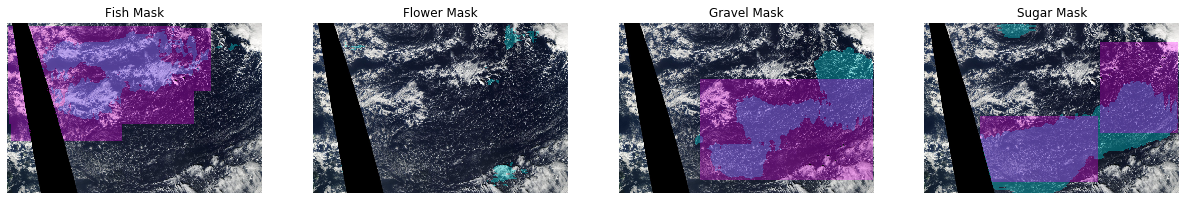

In [11]:
real_vs_pred(112,val_dataset,net,alpha=0.3)